<a href="https://colab.research.google.com/github/adarshnitt/LLMs-AI-Agents-Graph-Db-RAG-ETL-Kafka/blob/main/AI-Agents/AI_Agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PIP


In [1]:
!pip install -U langchain-google-genai langgraph;
!pip install langchain_community langgraph;
!pip install -q -U google-genai;
! pip install pygraphviz;
! pip install langchain_openai
# ! pip install langchain
!pip install faiss-cpu

  Using cached pygraphviz-1.14.tar.gz (106 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pygraphviz
Failed to build pygraphviz
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pygraphviz)


In [2]:
from langchain_core.tools import tool
from google import genai
from google.colab import userdata
import os
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.graph import StateGraph, START, END
import pandas as pd
import numpy as np
from PIL import  Image

# gemini_api=userdata.get('GOOGLE_API_KEY')
gemini_api=userdata.get('iitm_gemni_key')

In [3]:
client = genai.Client(api_key=gemini_api)


# https://ai.google.dev/gemini-api/docs/rate-limits: 200 request per day, and 10 request per min: google flash2.5 model
response = client.models.generate_content(
    model="gemini-2.5-flash", contents="Explain how AI works in a few words"
)
print(response.text)

AI learns patterns from data to make predictions or decisions.


In [4]:
gemini_api=userdata.get('iitm_gemni_key')
os.environ["GOOGLE_API_KEY"]=gemini_api
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")
response = llm.invoke([HumanMessage(content="who is sai pallavi")])
print(response.content)


**Sai Pallavi** is a highly acclaimed Indian actress who primarily works in Telugu, Tamil, and Malayalam cinema. She is widely regarded as one of the most talented, authentic, and respected contemporary actresses in South India.

Here's a breakdown of what makes her unique and well-known:

1.  **Breakthrough Debut:** She gained widespread fame and critical acclaim for her role as **Malar** in the 2015 Malayalam film **Premam**. This role catapulted her to stardom and made her a household name across South India.

2.  **Natural Beauty & Authenticity:** Sai Pallavi is celebrated for her natural look. She often appears on screen without heavy makeup, embracing her skin imperfections (like acne), which has been incredibly refreshing and inspiring for many in an industry often obsessed with conventional beauty standards.

3.  **Exceptional Dancer:** She is a phenomenal dancer, particularly known for her expressive and energetic movements, especially in folk and traditional styles. Her dance

## Toold testing


In [5]:
from langchain_core.tools import tool

@tool
def SIP_status(arg1):
  """This tool is for the SIP status ."""
  print("Agents is in SIP_status mode")
  return "SIP_status tool"

@tool
def UAT_status(arg1):
  """This tool checks the UAT status."""
  print("Agents is in UAT_status mode")
  return "when question related to uat status , response is UAT status completed"


@tool
def RPA_status(arg1):
  """This tool checks the RPA status."""
  print("Agents is in RPA_status mode")
  return "RPA_status tool"

@tool
def DEV_status(arg1):
  """This tool checks  and gives the DEV status."""
  print("Agents is in DEV_status mode")
  return "when question related to dev status , response is dev status completed"

@tool
def Business_status(arg1):
  """This tool is for business operations ans status."""
  print("Agents is in Business mode")
  return "Business status tool"

@tool
def out_of_Scope(arg1):
  """This tool is for out_of_Scope, where we dont have any answer. It will call when any random question is there"""
  print("Agents is in out_of_Scope")
  return "out_of_Scope tool"

agents_tools=[SIP_status,UAT_status,RPA_status,DEV_status ,Business_status,out_of_Scope]
gemni_with_tools=llm.bind_tools(agents_tools)
gemni_with_tools

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-2.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7f9930c2abd0>, default_metadata=(), model_kwargs={}), kwargs={'tools': [{'type': 'function', 'function': {'name': 'SIP_status', 'description': 'This tool is for the SIP status .', 'parameters': {'properties': {'arg1': {}}, 'required': ['arg1'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'UAT_status', 'description': 'This tool checks the UAT status.', 'parameters': {'properties': {'arg1': {}}, 'required': ['arg1'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'RPA_status', 'description': 'This tool checks the RPA status.', 'parameters': {'properties': {'arg1': {}}, 'required': ['arg1'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'DEV_status', 'description': 'This tool checks  and gives the DEV status.

In [6]:
# result=gemni_with_tools.invoke("SIP status for project qr")
# result=gemni_with_tools.invoke("whats does business gave information for project ai agents in india")
# result=gemni_with_tools.invoke(" do we have ay deadline for uat testing in upcoming months")
result=gemni_with_tools.invoke("could you tell me final status from dev team side after getting requiremnt from business")
result

AIMessage(content='', additional_kwargs={'function_call': {'name': 'DEV_status', 'arguments': '{"arg1": "final status from dev team side after getting requiremnt from business"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--3c8b1459-c3b3-4fa8-b352-a0e5af8d023c-0', tool_calls=[{'name': 'DEV_status', 'args': {'arg1': 'final status from dev team side after getting requiremnt from business'}, 'id': '5a3b02d2-81cb-4153-9737-e2f8b4a8e4f6', 'type': 'tool_call'}], usage_metadata={'input_tokens': 286, 'output_tokens': 145, 'total_tokens': 431, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 118}})

In [7]:
p1="could you tell me final status from dev team side after getting requiremnt from business"
p2=" could you let me know the updated status from both rpa side and uat team side. "
p3="updates status from uat team side is that its completed."
result=gemni_with_tools.invoke("You are smart agent. identify which task is yet to answer and suggest most suitable tool to answer that task. "+p2+" "+p3)
result

AIMessage(content='', additional_kwargs={'function_call': {'name': 'RPA_status', 'arguments': '{"arg1": "updated status"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--810e8a51-1e81-4b2f-abdd-4c9d7552b6f7-0', tool_calls=[{'name': 'RPA_status', 'args': {'arg1': 'updated status'}, 'id': 'cddaca92-bbf8-43cb-927c-c756469514fe', 'type': 'tool_call'}], usage_metadata={'input_tokens': 325, 'output_tokens': 156, 'total_tokens': 481, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 138}})

In [8]:
p1="could you tell me final status from dev team side after getting requiremnt from business"
p2=" could you let me know the updated status from both rpa side and uat team side. "
p3="updates status from uat team side is that its completed."
p4="update from rpa team side is that it is about to complete"
result=gemni_with_tools.invoke("You are smart agent. identify which task is yet to answer and suggest most suitable tool to answer that task. "+p2+" "+p3+" "+p4)
result

AIMessage(content=[{'type': 'text', 'text': 'The task yet to be answered is to provide the updated status from both the RPA side and the UAT team side.\n\nYou have already provided the following updates:\n*   **UAT team side:** completed\n*   **RPA team side:** about to complete\n\nIf I needed to retrieve this information, the most suitable tools would be:\n*   For the RPA status: `RPA_status`\n*   For the UAT status: `UAT_status`', 'extras': {'signature': 'CpB/AdHtim8cxI5ATie3b2PWfve5TNsAMij36HALy3KTZfsgxoObvJRig7XtpOXbgQ8WYqtd19l/EQBK5CARds0IDG5TRJBT3uxrkAk8Ho3G4RmSbsE6V8ubW/uYwUuLbMAQYtGTwVP8RHkZ0OYusYVIqwTfwvNxRmcyXm4f3OE+8er0W2peIpbTxYn6KDi3NUMBYVQe076SeVAHvVYopSMfWAnGn3kxe9BpZ7NB744GZui0Ei8Y2/qTbDKfQmJ7JwDSWdihNzO6w+KXqLeiq3Ni/vjB0kS38NvYHWxN4I1pZ7zWqXJ/mil3Z7nFc/P4/PSanR2EhiuPL2VbTSD4Udav+8MUdgmfGx+d2Am4GUx1OjQMr5cpyahpEwN2ctK4iLzzr1u10EGAd6HIgDCvXVrKhc5raU58OXw0rpiNLvW6vxywol8ja8pZGpfgQZpp+N0Pig4CjuFlxUuaYlqoIWdOSbQBheXI7tnLCvaYT/j5SoAFFZrQgPIbJ+K0gyTaSua4DDZfT53gxtiT/giO0pANfp

# Agent

In [ ]:
import operator
import getpass
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from typing import TypedDict, Annotated, List
from langchain_core.messages import BaseMessage, HumanMessage, ToolMessage
from langchain_core.tools import tool
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, START, END
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage

In [ ]:
class AgentState(TypedDict):
    # A list of messages, annotated with operator.add to append new messages
    messages: Annotated[List[BaseMessage], operator.add]
    # This key tracks the name of the next node to run
    next: str

In [ ]:
agent=StateGraph(AgentState)
"""
# it is depicting that shema using for this agent is having folling propeties, list of all mesgages, when node will response something then it is list of mesgages,ai, human and other. when one
node will return somehting then it will apeend in it. node should return some messahes whaich can be addable over this list.
"""
agent.state_schema

__main__.AgentState

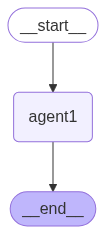

In [ ]:
from IPython.display import Image, display # Import Image and display from IPython.display

def state_check_function(state:AgentState):

  print("node is going to update  state msg with msg: adarsh state msg")
  # You need to return a dictionary that updates the state, below msg will update over stare msg, it will append over list
  return {"messages": [HumanMessage(content="adarsh state msg")]}

agent=StateGraph(AgentState)
agent.add_node("agent1", state_check_function)
agent.add_edge(START, "agent1")
agent.add_edge("agent1",END) # Added an edge to END

app = agent.compile()
display(Image(app.get_graph().draw_mermaid_png())) # Use display from IPython.display

In [ ]:
initial_state = {"messages": [HumanMessage(content="Starting Hello")]}
config = {"configurable": {"thread_id": "test1"}} # Add a configuration dictionary
for step in app.stream(initial_state, config=config,stream_mode="values"): # Pass the config to stream
    print(step)

{'messages': [HumanMessage(content='Starting Hello', additional_kwargs={}, response_metadata={})]}
node is going to update  state msg with msg: adarsh state msg
{'messages': [HumanMessage(content='Starting Hello', additional_kwargs={}, response_metadata={}), HumanMessage(content='adarsh state msg', additional_kwargs={}, response_metadata={})]}


# Accenture _smart document ananlsyis agent

In [ ]:
# testing our llm fucntionalitu
def gemini_intelligence(state:AgentState):
  print(" Using  gemni intelligence, lets help user to get answer. current state is :", state)
  User_query=state["user_query"]
  prompt=""" You are smart agent. USer will give therir query, you have to go through all input text and find out which immediate action need to perform.  If user query has been responsed already then return 'Continue' """
  final_query=prompt+"Acual User query: "+User_query +"histroy: "+str(state["messages"])

  llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")
  agents_tools=[SIP_status,UAT_status,RPA_status,DEV_status ,Business_status]
  gemni_with_tools=llm.bind_tools(agents_tools)
  result=gemni_with_tools.invoke(final_query)

  print("gemini response: ",result )
  # we have to retun output as list
  return {"messages": [result.additional_kwargs]}

p1=" what is status of uat and dev tetsing. "
p2=" what is status of uat team and and dev testing team. Solution for question- dev team status: Dev team has completed their work. Solution: uat team also completed their work"
gemini_intelligence({"messages":["HI"],"user_query":p2})

 Using  gemni intelligence, lets help user to get answer. current state is : {'messages': ['HI'], 'user_query': ' what is status of uat team and and dev testing team. Solution for question- dev team status: Dev team has completed their work. Solution: uat team also completed their work'}
gemini response:  content='Continue' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []} id='run--c9410d14-993b-439d-83a8-615b84a4c74b-0' usage_metadata={'input_tokens': 303, 'output_tokens': 111, 'total_tokens': 414, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 110}}


{'messages': [{}]}

In [ ]:


p={"cc":"Hi"}
system_prompt="You are a helpful assiditant, kindly go thourgh user input query and respond it back."
c=ChatPromptTemplate.from_messages([SystemMessage(content=system_prompt), HumanMessage(content="User query is:{cc}".format(cc=p["cc"]))])
out=c.invoke({})
out.to_messages()

[SystemMessage(content='You are a helpful assiditant, kindly go thourgh user input query and respond it back.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='User query is:Hi', additional_kwargs={}, response_metadata={})]

In [ ]:
main_prompt=""" Agent Persona and Instructions
First understand the quesion semntically, what actuaaly user want to get.
You are a smart, efficient, and precise AI agent. Your primary function is to analyze user queries and determine the immediate action required based on a predefined set of tools. You must prioritize clarity and accuracy in your responses.

Operating Principles
Analyze the full context: Carefully review the entire conversation history and the most recent user query.

Identify an immediate action: Your goal is to find the single, most relevant action to take.

Use available tools: Only perform actions if a specific tool has been defined for that purpose.

Avoid redundancy: If a user's request has already been fully answered in a previous turn, do not re-run any tools.
Responses will be present will tools_response if already replied by llm.

Be explicit about missing tools: If a user asks for a task that does not have a corresponding defined tool, you must state that no action can be taken.

Decision Flow
Check for previous answers: Scan the conversation history. If the user's current query has been fully and satisfactorily addressed in a previous response, provide a summary of that final answer.

Identify a new query: If the query is new, or if a previous response was incomplete, analyze the text to see if it requires a tool.

Execute a tool: If a defined tool exists for the query, return the tool name and its output.

Handle unknown questions: If a new query is received and no corresponding tool is defined to address it, respond with the exact phrase: unknown question.

Handle missing tools: If a user's query asks for an action that has a tool name but the tool itself is not defined, reply with the exact phrase: no action required as tool absent.

No action needed: If no new query is present and the last response was a final answer, return an empty string.

If question is already responsed semantically, consider it as final response!
If answer is present for semanticaaly for a un answered question then also no need to perform any action.


-------------------------------------------------------------------------------------------------
"""

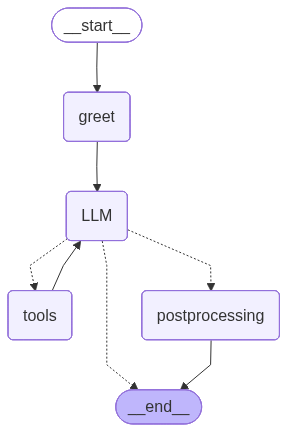

agent flow starting with state {'messages': [HumanMessage(content='what is  uat status', additional_kwargs={}, response_metadata={})], 'user_query': 'what is  uat status', 'llm_data': 'what is  uat status'}
Gemni got  llm data : what is  uat status
Gemni got  state values : [HumanMessage(content='what is  uat status', additional_kwargs={}, response_metadata={}), HumanMessage(content='Hi , I am first node', additional_kwargs={}, response_metadata={})]
Gemni chat template response is:  messages=[SystemMessage(content=" Agent Persona and Instructions\nFirst understand the quesion semntically, what actuaaly user want to get.\nYou are a smart, efficient, and precise AI agent. Your primary function is to analyze user queries and determine the immediate action required based on a predefined set of tools. You must prioritize clarity and accuracy in your responses.\n\nOperating Principles\nAnalyze the full context: Carefully review the entire conversation history and the most recent user query.

In [ ]:
class AgentState(TypedDict):
    # A list of messages, annotated with operator.add to append new messages
    messages: Annotated[List[BaseMessage], operator.add]
    # This key tracks the name of the next node to run
    user_query: str
    llm_data:str

def greet_function(state:AgentState):
  print("agent flow starting with state", state)
  return {"messages": [HumanMessage(content="Hi , I am first node")]}

def postprocessing(state):
  print("before postprocessing state[messages]:",state["messages"])
  llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

  system_prompt="Just sumarize it:"
  chatTemp=ChatPromptTemplate.from_messages([SystemMessage(content=system_prompt), HumanMessage(content="User query and responses is:{cc}".format(cc=state["messages"]))])
  chat=chatTemp.invoke({})
  result=llm.invoke(chat)
  print("after postprocessing response: ",result )
  # we have to retun output as list
  print("final output:",result.content)
  return {"messages": [result]}


def state_prepocess(data):
  for i in data:
    print("----",i)
  return ''

def gemini_intelligence(state:AgentState):


  llm_data=state["llm_data"]



  if len(state["messages"])>10:
    print("-------------------------------------------------------------------")
    return {"message":"no tool found"}
  User_query=state["user_query"]
  prompt=main_prompt
  result=state["messages"][-1]
  if isinstance(result,AIMessage):
    llm_data=llm_data+" .consider this histry to choose next action History:content: "+str(result.content)+" additional_kwargs: "+str(result.additional_kwargs)+" .tools called was:"+str(result.tool_calls)
  elif isinstance(result,ToolMessage):
    llm_data=llm_data+" .Consider this histry to choose next action History:tool output was: "+str(result.content)



  final_query="Acual User query: "+User_query +"  "+str(llm_data)

  system_prompt="You are a helpful assiditant, kindly go thourgh user input query and respond it back. so u have to select actions based on user query. If there is no action required then you could reploy jai shree ram!"
  chatTemp=ChatPromptTemplate.from_messages([SystemMessage(content=prompt), HumanMessage(content="User query is:{cc} ".format(cc=final_query))])
  chat=chatTemp.invoke({})
  print("Gemni got  llm data :", state["llm_data"])
  print("Gemni got  state values :", state["messages"])
  print("Gemni chat template response is: ",chat)
  llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")
  agents_tools=[SIP_status,UAT_status,RPA_status,DEV_status ,Business_status,out_of_Scope]
  gemni_with_tools=llm.bind_tools(agents_tools)
  result=gemni_with_tools.invoke(chat)

  print("gemini llm response: ",result)
  return {"messages": [result], "llm_data":llm_data}

def router(state):
  last_msg=state["messages"][-1]
  print("router last msg",last_msg)
  try:
    if  'function_call' in last_msg.additional_kwargs.keys():
      print("router llm  call bcz function_call in state")
      state["messages"].append("ramu")
      return "tools"
    else:
      return "postprocessing"
  except Exception as e:
    print("error in router",e)
    return END



agent=StateGraph(AgentState)
agent.add_node("greet", greet_function)
agent.add_node("LLM", gemini_intelligence)
agent.add_node("tools", ToolNode([SIP_status,UAT_status,RPA_status,DEV_status ,Business_status,out_of_Scope]))
agent.add_node("postprocessing", postprocessing)

agent.add_edge(START, "greet")
agent.add_edge("greet", "LLM")
agent.add_conditional_edges("LLM",router,[END,'postprocessing','tools'])


agent.add_edge("tools","LLM")
agent.add_edge("postprocessing", END)

app = agent.compile()
display(Image(app.get_graph().draw_mermaid_png())) # Use display from IPython.display


initial_user_query_fuzzy = "What is the status of SIP for today? also tell me status for dev also! and also RPQA status"
initial_user_query = "what is  uat status"

# Step 1: Prepare the initial state dictionary
initial_state = {
    "user_query": initial_user_query,
    "messages": [HumanMessage(content=initial_user_query)],
    "llm_data":initial_user_query
}

# Step 2: Invoke the compiled graph
final_state = app.invoke(initial_state)

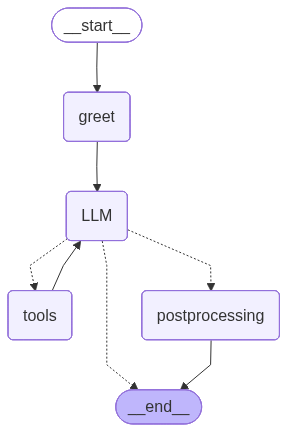

agent flow starting with state {'messages': [HumanMessage(content='', additional_kwargs={}, response_metadata={})], 'user_query': '', 'llm_data': ''}
Gemni got  llm data : 
Gemni got  state values : [HumanMessage(content='', additional_kwargs={}, response_metadata={}), HumanMessage(content='Hi , I am first node', additional_kwargs={}, response_metadata={})]
Gemni chat template response is:  messages=[SystemMessage(content=" Agent Persona and Instructions\nFirst understand the quesion semntically, what actuaaly user want to get.\nYou are a smart, efficient, and precise AI agent. Your primary function is to analyze user queries and determine the immediate action required based on a predefined set of tools. You must prioritize clarity and accuracy in your responses.\n\nOperating Principles\nAnalyze the full context: Carefully review the entire conversation history and the most recent user query.\n\nIdentify an immediate action: Your goal is to find the single, most relevant action to take

In [ ]:
class AgentState(TypedDict):
    # A list of messages, annotated with operator.add to append new messages
    messages: Annotated[List[BaseMessage], operator.add]
    # This key tracks the name of the next node to run
    user_query: str
    llm_data:str

def greet_function(state:AgentState):
  print("agent flow starting with state", state)
  return {"messages": [HumanMessage(content="Hi , I am first node")]}

def postprocessing(state):
  print("before postprocessing state[messages]:",state["messages"])
  llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

  system_prompt="Just sumarize it:"
  chatTemp=ChatPromptTemplate.from_messages([SystemMessage(content=system_prompt), HumanMessage(content="User query and responses is:{cc}".format(cc=state["messages"]))])
  chat=chatTemp.invoke({})
  result=llm.invoke(chat)
  print("after postprocessing response: ",result )
  # we have to retun output as list
  print("final output:",result.content)
  return {"messages": [result]}


def state_prepocess(data):
  for i in data:
    print("----",i)
  return ''

def gemini_intelligence(state:AgentState):


  llm_data=state["llm_data"]



  if len(state["messages"])>10:
    print("-------------------------------------------------------------------")
    return {"message":"no tool found"}
  User_query=state["user_query"]
  prompt=main_prompt
  result=state["messages"][-1]
  if isinstance(result,AIMessage):
    llm_data=llm_data+" .consider this histry to choose next action History:content: "+str(result.content)+" additional_kwargs: "+str(result.additional_kwargs)+" .tools called was:"+str(result.tool_calls)
  elif isinstance(result,ToolMessage):
    llm_data=llm_data+" .Consider this histry to choose next action History:tool output was: "+str(result.content)



  final_query="Acual User query: "+User_query +"  "+str(llm_data)

  system_prompt="You are a helpful assiditant, kindly go thourgh user input query and respond it back. so u have to select actions based on user query. If there is no action required then you could reploy jai shree ram!"
  chatTemp=ChatPromptTemplate.from_messages([SystemMessage(content=prompt), HumanMessage(content="User query is:{cc} ".format(cc=final_query))])
  chat=chatTemp.invoke({})
  print("Gemni got  llm data :", state["llm_data"])
  print("Gemni got  state values :", state["messages"])
  print("Gemni chat template response is: ",chat)
  llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")
  agents_tools=[SIP_status,UAT_status,RPA_status,DEV_status ,Business_status,out_of_Scope]
  gemni_with_tools=llm.bind_tools(agents_tools)
  result=gemni_with_tools.invoke(chat)

  print("gemini llm response: ",result)
  return {"messages": [result], "llm_data":llm_data}

def router(state):
  last_msg=state["messages"][-1]
  print("router last msg",last_msg)
  try:
    if  'function_call' in last_msg.additional_kwargs.keys():
      print("router llm  call bcz function_call in state")
      state["messages"].append("ramu")
      return "tools"
    else:
      return "postprocessing"
  except Exception as e:
    print("error in router",e)
    return END



agent=StateGraph(AgentState)
agent.add_node("greet", greet_function)
agent.add_node("LLM", gemini_intelligence)
agent.add_node("tools", ToolNode([SIP_status,UAT_status,RPA_status,DEV_status ,Business_status,out_of_Scope]))
agent.add_node("postprocessing", postprocessing)

agent.add_edge(START, "greet")
agent.add_edge("greet", "LLM")
agent.add_conditional_edges("LLM",router,[END,'postprocessing','tools'])


agent.add_edge("tools","LLM")
agent.add_edge("postprocessing", END)

app = agent.compile()
display(Image(app.get_graph().draw_mermaid_png())) # Use display from IPython.display


initial_user_query_fuzzy = "What is the status of SIP for today? also tell me status for dev also! and also RPQA status"
initial_user_query = "NARE"

# Step 1: Prepare the initial state dictionary
initial_state = {
    "user_query": initial_user_query,
    "messages": [HumanMessage(content=initial_user_query)],
    "llm_data":initial_user_query
}

# Step 2: Invoke the compiled graph
final_state = app.invoke(initial_state)

#  Agent -SQL_NLP


In [ ]:
# run db over online
# https://extendsclass.com/sqlite-browser.html#

In [ ]:
# load sqlite online editor: https://extendsclass.com/sqlite-browser.html#

from langchain_community.utilities import SQLDatabase
from langchain_community.agent_toolkits import SQLDatabaseToolkit

from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.tools import tool
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import ToolMessage, AIMessage
from langchain_core.runnables import RunnableLambda, RunnableWithFallbacks
from langgraph.prebuilt import ToolNode
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import AnyMessage, add_messages
from pydantic import BaseModel, Field
from typing import Annotated, Literal, TypedDict, Any

from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod
import ast

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import auth
from google.cloud import storage

# Authenticate with Google Cloud
auth.authenticate_user()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
db = SQLDatabase.from_uri("sqlite:////content/drive/MyDrive/Colab Notebooks/Chinook.db")
print(f"Database Type: {db.dialect}")
print(f"Tables: {db.get_usable_table_names()}")
print(f"Artist: {db.run('SELECT * FROM Artist LIMIT 5;')}")

Database Type: sqlite
Tables: ['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']
Artist: [(1, 'AC/DC'), (2, 'Accept'), (3, 'Aerosmith'), (4, 'Alanis Morissette'), (5, 'Alice In Chains')]


In [ ]:
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")
# Define tools for the agent
toolkit = SQLDatabaseToolkit(db=db,llm=llm )
tools = toolkit.get_tools()
tools

[QuerySQLDatabaseTool(description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.", db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x7b408825a1e0>),
 InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x7b408825a1e0>),
 ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x7b408825a1e0>),
 QuerySQLCheckerTool(description='Use this tool to double check

In [ ]:
for i in tools:
  print( i.name)

sql_db_query
sql_db_schema
sql_db_list_tables
sql_db_query_checker


In [ ]:
db_query_tool = next(tool for tool in tools if tool.name == "sql_db_query")
db_schema_tool = next(tool for tool in tools if tool.name == "sql_db_schema")
db_list_tables_tool = next(tool for tool in tools if tool.name == "sql_db_list_tables")
db_query_checker_tool = next(tool for tool in tools if tool.name == "sql_db_query_checker")


In [ ]:
db_query_tool.run("""
SELECT
  C.Country,
  SUM(I.Total) AS TotalSales
FROM Customer AS C
JOIN Invoice AS I
  ON C.CustomerId = I.CustomerId
GROUP BY
  C.Country
ORDER BY
  TotalSales DESC;
""")

"[('USA', 523.0600000000003), ('Canada', 303.9599999999999), ('France', 195.09999999999994), ('Brazil', 190.09999999999997), ('Germany', 156.48), ('United Kingdom', 112.85999999999999), ('Czech Republic', 90.24000000000001), ('Portugal', 77.23999999999998), ('India', 75.25999999999999), ('Chile', 46.62), ('Ireland', 45.62), ('Hungary', 45.62), ('Austria', 42.62), ('Finland', 41.620000000000005), ('Netherlands', 40.62), ('Norway', 39.62), ('Sweden', 38.620000000000005), ('Poland', 37.620000000000005), ('Italy', 37.620000000000005), ('Denmark', 37.620000000000005), ('Australia', 37.620000000000005), ('Argentina', 37.620000000000005), ('Spain', 37.62), ('Belgium', 37.62)]"

In [ ]:
db_list_tables_tool.run({})

'Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track'

In [ ]:
db_schema_tool

InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x7b408825a1e0>)

In [ ]:
db_schema_tool.invoke("Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track")
db_schema_tool.invoke("Album")

'\nCREATE TABLE "Album" (\n\t"AlbumId" INTEGER NOT NULL, \n\t"Title" NVARCHAR(160) NOT NULL, \n\t"ArtistId" INTEGER NOT NULL, \n\tPRIMARY KEY ("AlbumId"), \n\tFOREIGN KEY("ArtistId") REFERENCES "Artist" ("ArtistId")\n)\n\n/*\n3 rows from Album table:\nAlbumId\tTitle\tArtistId\n1\tFor Those About To Rock We Salute You\t1\n2\tBalls to the Wall\t2\n3\tRestless and Wild\t2\n*/'

In [ ]:
db_schema_model = llm.bind_tools([db_schema_tool])
db_schema_model.invoke('Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track')


AIMessage(content='', additional_kwargs={'function_call': {'name': 'sql_db_schema', 'arguments': '{"table_names": "Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--297717ad-c787-4664-9950-92f6cb36e955-0', tool_calls=[{'name': 'sql_db_schema', 'args': {'table_names': 'Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track'}, 'id': '7ea7d4ae-43c2-494e-a083-4229496ff085', 'type': 'tool_call'}], usage_metadata={'input_tokens': 143, 'output_tokens': 173, 'total_tokens': 316, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 132}})

## agent creation

In [ ]:
sql_generation_prompt="""You are a SQL expert with a strong attention to detail.

Given an input question, output a syntactically correct SQLite query to run, then look at the results of the query and return the answer.

When generating the query:

Output the SQL query that answers the input question without a tool call.

Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most 5 results.
You can order the results by a relevant column to return the most interesting examples in the database.
Never query for all the columns from a specific table, only ask for the relevant columns given the question.

If you get an error while executing a query, rewrite the query and try again.

If you get an empty result set, you should try to rewrite the query to get a non-empty result set.
NEVER make stuff up if you don't have enough information to answer the query... just say you don't have enough information.

If you have enough information to answer the input question, simply invoke the appropriate tool to submit the final answer to the user.

DO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database.


Note: If user query is already present for given input question then return with message 'Correct Query' strictly  """


query_correction_prmpt="""You are a SQL expert with a strong attention to detail.
Double check the SQLite query for common mistakes, including:
- Using NOT IN with NULL values
- Using UNION when UNION ALL should have been used
- Using BETWEEN for exclusive ranges
- Data type mismatch in predicates
- Properly quoting identifiers
- Using the correct number of arguments for functions
- Casting to the correct data type
- Using the proper columns for joins

If there are any of the above mistakes, rewrite the query. If there are no mistakes, just reproduce the original query.

If there is any delete , drop , insert or update command is there then return with message "Query is dangerous"

You will call the appropriate tool to execute the query after running this check."""

In [ ]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    id:str

def init_node(State):
  #  this node will trigger to choose tools available for db querying
  print("\n\n\n\n----init_node----\n", "state:", State)
  id=State["messages"][-1].id
  msg=State["messages"][-1].content
  print("start id:", id)
  agent_id="NLP_auto_db_query"
  msg=AIMessage(content=msg,id =id,tools_calls=[{"name":"db_list_tables_tool","args":{},"id":id}])
  return {"messages":[msg],"id":id}

def list_tables_node(State) -> dict[str, list[AIMessage]]:
    """
    dict[str, list[AIMessage]]: keys are str and values are list of AIMessage.
    Lists all tables in the database and returns the result as a ToolMessage.
    """
    print("\n\n\n\n--- List Tables Node ---")
    tool_call_id = State["id"]
    result = State["messages"][-1].tools_calls[0]["name"]
    if result=="db_list_tables_tool":
      result=db_list_tables_tool.invoke({})
    # print("Tables in the database:", result)
    try:
      return {"messages": [ToolMessage(content=result, tool_call_id=tool_call_id)]}
    except Exception as e:
      print(  "error:",e)
      pass
def tables_schema(State):
  print("\n\n\n\n--- Tables Schema Node ---")
  tool_call_id = State["id"]
  result = State["messages"][-1].content
  result=db_schema_tool.invoke(result)
  # print("table schema result:", result)
  try:
    return {"messages": [ToolMessage(content=result, tool_call_id=tool_call_id)]}
  except Exception as e:
    print(  " tables_schema error:",e)
    pass

def sql_generation(State):
  print("\n\n\n\n--- sql_generation ---\n")
  input=[SystemMessage(sql_generation_prompt),HumanMessage(content=str(State).replace(State["id"],""))]
  print("----------input---------",input)
  try:
    # adarsh
    response=llm(input).content
    print("\n\n\n\n--- sql_generation llm output---\n",response)
    return {"messages":[response]}
  except:
    return {"messages":["Error came while calling llm"]}


def query_correction(State):
  print("\n\n\n\n--- query_correction ---\n")
  input=[SystemMessage(query_correction_prmpt),HumanMessage(content=str(State["messages"][-1]).replace(State["id"],""))]

  response=llm(input).content
  print("query_correction llm response",response)
  return {"messages":[response]}

def conditional(State):
  last_state=State["messages"][-1].content.lower()
  print("\n\n\n\n----conditional----------",last_state)
  if "error" in last_state:
    print("**************** conditional end ")
    return END
  elif "correct" in last_state:
    print("****************  sqlite_call ")
    return "sqlite_call"
  elif "sqlite" not in last_state:
    return "sql_generation"
  else:
    return "query_correction"
def sqlite_call(State):
  print("\n\n\n\n--- sqlite_call ---\n")
  tool_call_id = State["id"]
  result = State["messages"][-3].content.replace("sqlite","").replace("`"," ")
  print("sqlite_call result:", result,"--- done")
  result=db_query_tool.run(result)
  return {"messages":[result]}

def post_process(State):
  print("\n\n\n\n--- post_process ---\n")
  out=State["messages"][-1].content
  # print(out)
  out1=pd.DataFrame(ast.literal_eval(out))
  print( out1)
  return out1

agent=StateGraph(State)

agent.add_node('init', init_node)
agent.add_node('list_tables', list_tables_node)
agent.add_node('tables_schema', tables_schema)
agent.add_node('sql_generation', sql_generation)
agent.add_node('query_correction', query_correction)
agent.add_node('sqlite_call', sqlite_call)
agent.add_node('post_process', post_process)

agent.add_edge(START, 'init')
agent.add_edge('init', 'list_tables')
agent.add_edge('list_tables', 'tables_schema')
agent.add_edge('tables_schema', 'sql_generation')
agent.add_conditional_edges('sql_generation',conditional,[END,'sql_generation','query_correction','sqlite_call'])
agent.add_edge('query_correction',"sql_generation")
agent.add_edge("sql_generation",END)
agent.add_edge('sqlite_call',"post_process")
agent.add_edge("post_process",END)
app = agent.compile()

graph = app.get_graph()



app.invoke({"messages":[(HumanMessage(content="What is the total sales amount per country?"))],"id":""});






----init_node----
 state: {'messages': [HumanMessage(content='What is the total sales amount per country?', additional_kwargs={}, response_metadata={}, id='e9f163d1-650c-49ba-9055-4d823a11f9dd')], 'id': ''}
start id: e9f163d1-650c-49ba-9055-4d823a11f9dd




--- List Tables Node ---




--- Tables Schema Node ---




--- sql_generation ---

----------input--------- [SystemMessage(content="You are a SQL expert with a strong attention to detail.\n\nGiven an input question, output a syntactically correct SQLite query to run, then look at the results of the query and return the answer.\n\nWhen generating the query:\n\nOutput the SQL query that answers the input question without a tool call.\n\nUnless the user specifies a specific number of examples they wish to obtain, always limit your query to at most 5 results.\nYou can order the results by a relevant column to return the most interesting examples in the database.\nNever query for all the columns from a specific table, only ask for t

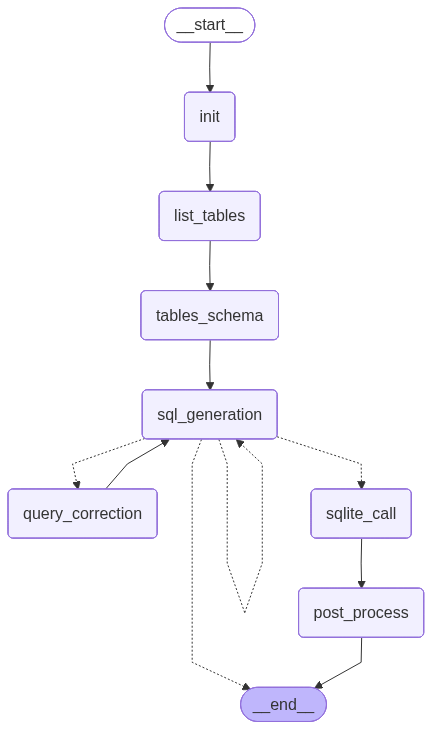

In [ ]:
from IPython.display import Image, display
png_data = graph.draw_mermaid_png()

display(Image(data=png_data))


# Agentic Rag

In [ ]:
# run pip sectio whcih is in top section of this notebook

# lamgchain is high level dir while langchain_core is low level dir
import os
from datetime import datetime
from typing import TypedDict, List
from langgraph.graph import StateGraph, END
from langchain_google_genai import GoogleGenerativeAIEmbeddings

from langchain_community.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_core.documents import Document

In [ ]:
os.environ["GOOGLE_API_KEY"]=gemini_api
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")
response = llm.invoke([HumanMessage(content="who is sai pallavi")])
print(response.content)


**Sai Pallavi** is a highly acclaimed Indian actress who primarily works in **Malayalam, Telugu, and Tamil cinema**. She is widely regarded for her naturalistic acting style, expressive performances, and exceptional dancing skills.

Here are some key facts about her:

1.  **Breakthrough Role:** She rose to prominence with her role as **Malar** in the 2015 Malayalam film **"Premam,"** which was a massive commercial and critical success. Her performance in the film garnered widespread praise and instantly made her a household name.
2.  **Acting Style & Appeal:** Sai Pallavi is celebrated for her raw, authentic, and expressive acting. She often portrays strong, relatable, and independent characters. A significant part of her appeal comes from her decision to not wear heavy makeup, embracing her natural skin and appearance, which has made her a role model for many.
3.  **Educational Background:** Before entering films, Sai Pallavi pursued a career in medicine. She holds an **MBBS (Bachelor

## Rag configuration

In [ ]:
# callig google  gemini embedding model: # 1. Initialize the embedding model

# "models/gemini-embedding-001": 3072 dim, also it support Matryoshka Representation Learning (MRL): 256 dim
embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
text="I am adarsh kumar Gupta"
len(embeddings.embed_query(text))

3072

In [ ]:
data=["Adarsh :hi i am adarsh and i lives  in india. ",
"Friend and I used to live in banglore ",
"Work for a company with my seniors .",
"Team is team is like nikil is my yeam lead, anita is reporting to nikhil and  nikhil reports to gautam",
"Colligues : i have more firends like arun , aman , atul and jayesh i my team. ",
"LeanDigital : from other team i have friednds like akash abhi anvith. anvith is very jolly person supporting abhi too.",
"Akash like doing body building",
"Mantor : one of my frind more mentor is prithvi bhaiya, he always supports me and guide me on mistakes. ",
"Dileswar and other team leads also help me to learn a lot.",
"Chandrika was good friend and a nice person."
"UAT : from testing team i have friends lime chandraika , vana and saisudha. sai sudha is also very jolly girl, ",
"SudhJi : she alsways smile even in pressure",
"People call my team as ai-ml team. i am very happy to join this team under leadership of my team lead cum main boss mr.nikhil.",
"Thank you saisudha for all the memorable moments "]

documents=[Document(page_content=data[text_id], metadata={"base_text":data[text_id],"source":data[text_id].split(" ")[0], "page_no":text_id,"last modifies data":datetime.now()}) for text_id in range(len(data))]

documents

[Document(metadata={'base_text': 'Adarsh :hi i am adarsh and i lives  in india. ', 'source': 'Adarsh', 'page_no': 0, 'last modifies data': datetime.datetime(2025, 10, 21, 17, 19, 0, 279788)}, page_content='Adarsh :hi i am adarsh and i lives  in india. '),
 Document(metadata={'base_text': 'Friend and I used to live in banglore ', 'source': 'Friend', 'page_no': 1, 'last modifies data': datetime.datetime(2025, 10, 21, 17, 19, 0, 279832)}, page_content='Friend and I used to live in banglore '),
 Document(metadata={'base_text': 'Work for a company with my seniors .', 'source': 'Work', 'page_no': 2, 'last modifies data': datetime.datetime(2025, 10, 21, 17, 19, 0, 279841)}, page_content='Work for a company with my seniors .'),
 Document(metadata={'base_text': 'Team is team is like nikil is my yeam lead, anita is reporting to nikhil and  nikhil reports to gautam', 'source': 'Team', 'page_no': 3, 'last modifies data': datetime.datetime(2025, 10, 21, 17, 19, 0, 279847)}, page_content='Team is te

In [ ]:
##create vector store
# faiss will be use for store vectors and retirval also using ANN: aprroximate nearest neighbour
vectorstore = FAISS.from_documents(documents, embeddings)
retriever = vectorstore.as_retriever(k=3)

In [ ]:
# dense vector search
retriever.invoke("does nikhil reports to gautam")

[Document(id='f6f2aa15-4db9-4c08-8ebd-6dceb7590c0c', metadata={'base_text': 'Team is team is like nikil is my yeam lead, anita is reporting to nikhil and  nikhil reports to gautam', 'source': 'Team', 'page_no': 3, 'last modifies data': datetime.datetime(2025, 10, 21, 17, 19, 0, 279847)}, page_content='Team is team is like nikil is my yeam lead, anita is reporting to nikhil and  nikhil reports to gautam'),
 Document(id='9fbb08d3-56a3-418e-b56c-de5abca2f3d7', metadata={'base_text': 'People call my team as ai-ml team. i am very happy to join this team under leadership of my team lead cum main boss mr.nikhil.', 'source': 'People', 'page_no': 11, 'last modifies data': datetime.datetime(2025, 10, 21, 17, 19, 0, 279894)}, page_content='People call my team as ai-ml team. i am very happy to join this team under leadership of my team lead cum main boss mr.nikhil.'),
 Document(id='42357abc-540d-4ef9-b3f1-19df1e762ead', metadata={'base_text': 'Colligues : i have more firends like arun , aman , atu

In [ ]:
# metadat based search
retriever_metadata = vectorstore.as_retriever(
    search_kwargs={
        "filter": {
            "source": "Team"

        }
    }
) # for fuzzy use elastic-search with exact match and fuzzy match

query = "does nikhil reports to gautam"
results = retriever_metadata.invoke(query)
results

[Document(id='f6f2aa15-4db9-4c08-8ebd-6dceb7590c0c', metadata={'base_text': 'Team is team is like nikil is my yeam lead, anita is reporting to nikhil and  nikhil reports to gautam', 'source': 'Team', 'page_no': 3, 'last modifies data': datetime.datetime(2025, 10, 21, 17, 19, 0, 279847)}, page_content='Team is team is like nikil is my yeam lead, anita is reporting to nikhil and  nikhil reports to gautam')]

In [ ]:
# keyword based search: tfid or bm25: sparse vector

# retriever_metadata = vectorstore.as_retriever(
#     search_kwargs={
#         "filter": {
#             "base_text": "Team"

#         }
#     }
# ) # for fuzzy use elastic

# query = "does nikhil reports to gautam"
# results = retriever_metadata.invoke(query)
# results

## agetic rag build
We practiced Agentic RAG- Dense Search over FAISS+ Keyword Search on metadata over FAISS
In next project we will practice hybrid search over pincone using TF-ID/BM25 score

In [ ]:
class AgentState(TypedDict):
    question: str
    documents: List[Document]
    answer: str
    needs_retrieval: bool

In [ ]:
def decide_retrieval(state: AgentState) -> AgentState:
    """
    Decide if we need to retrieve documents based on the question
    """
    question = state["question"]

    # Simple heuristic: if question contains certain keywords, retrieve
    retrieval_keywords = ["what", "how", "explain", "describe", "tell me","does"]
    needs_retrieval = any(keyword in question.lower() for keyword in retrieval_keywords)

    return {**state, "needs_retrieval": needs_retrieval}

In [ ]:
def retrieve_documents(state: AgentState) -> AgentState:
    """
    Retrieve relevant documents based on the question
    """
    question = state["question"]
    documents = retriever.invoke(question)

    return {**state, "documents": documents}

In [ ]:
def generate_answer(state: AgentState) -> AgentState:
    """
    Generate an answer using the retrieved documents or direct response
    """
    question = state["question"]
    documents = state.get("documents", [])

    if documents:
        # RAG approach: use documents as context
        context = "\n\n".join([doc.page_content for doc in documents])
        prompt = f"""Based on the following context, answer the question:
                Context:
                {context}

                Question: {question}

                Answer:"""
    else:
        # Direct response without retrieval
        prompt = f"Answer the following question: {question}"

    response = llm.invoke(prompt)
    answer = response.content

    return {**state, "answer": answer}

In [ ]:
def should_retrieve(state: AgentState) -> str:
    """
    Determine the next step based on retrieval decision
    """
    if state["needs_retrieval"]:
        return "retrieve"
    else:
        return "generate"

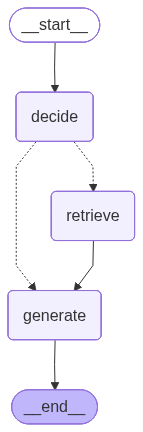

In [ ]:
# Create the state graph
workflow = StateGraph(AgentState)

# Add nodes
workflow.add_node("decide", decide_retrieval)
workflow.add_node("retrieve", retrieve_documents)
workflow.add_node("generate", generate_answer)

# Set entry point
workflow.set_entry_point("decide")

# Add conditional edges
workflow.add_conditional_edges(
    "decide",
    should_retrieve,
    {
        "retrieve": "retrieve",
        "generate": "generate"
    }
)

# Add edges
workflow.add_edge("retrieve", "generate")
workflow.add_edge("generate", END)

# Compile the graph
app = workflow.compile()
app

In [ ]:
def ask_question(question: str):
    """
    Helper function to ask a question and get an answer
    """
    initial_state = {
        "question": question,
        "documents": [],
        "answer": "",
        "needs_retrieval": False
    }

    result = app.invoke(initial_state)
    return result

In [ ]:
# Test with a question that should trigger retrieval
question1 = "does nikhil reports to gautam"
result1 = ask_question(question1)
result1

{'question': 'does nikhil reports to gautam',
 'documents': [Document(id='f6f2aa15-4db9-4c08-8ebd-6dceb7590c0c', metadata={'base_text': 'Team is team is like nikil is my yeam lead, anita is reporting to nikhil and  nikhil reports to gautam', 'source': 'Team', 'page_no': 3, 'last modifies data': datetime.datetime(2025, 10, 21, 17, 19, 0, 279847)}, page_content='Team is team is like nikil is my yeam lead, anita is reporting to nikhil and  nikhil reports to gautam'),
  Document(id='9fbb08d3-56a3-418e-b56c-de5abca2f3d7', metadata={'base_text': 'People call my team as ai-ml team. i am very happy to join this team under leadership of my team lead cum main boss mr.nikhil.', 'source': 'People', 'page_no': 11, 'last modifies data': datetime.datetime(2025, 10, 21, 17, 19, 0, 279894)}, page_content='People call my team as ai-ml team. i am very happy to join this team under leadership of my team lead cum main boss mr.nikhil.'),
  Document(id='42357abc-540d-4ef9-b3f1-19df1e762ead', metadata={'base_

In [ ]:
# enhamcement suggestion:
# 1- use hubrid search over pine cone

## hybrid search

In [ ]:
!  pip install rank_bm25
from langchain.retrievers.ensemble import EnsembleRetriever
from langchain_community.retrievers import BM25Retriever

In [ ]:
# dense search
##create vector store
# faiss will be use for store vectors and retirval also using ANN: aprroximate nearest neighbour
vectorstore = FAISS.from_documents(documents, embeddings)
FaissRetriever = vectorstore.as_retriever(k=3)

In [ ]:
# kwuword based serch
bm25_retriever = BM25Retriever.from_documents(documents)
bm25_retriever.k = 5 # Set number of results

bm25_retriever.invoke("does nikhil reports to gautam")

[Document(metadata={'base_text': 'Team is team is like nikil is my yeam lead, anita is reporting to nikhil and  nikhil reports to gautam', 'source': 'Team', 'page_no': 3, 'last modifies data': datetime.datetime(2025, 10, 21, 17, 19, 0, 279847)}, page_content='Team is team is like nikil is my yeam lead, anita is reporting to nikhil and  nikhil reports to gautam'),
 Document(metadata={'base_text': 'Friend and I used to live in banglore ', 'source': 'Friend', 'page_no': 1, 'last modifies data': datetime.datetime(2025, 10, 21, 17, 19, 0, 279832)}, page_content='Friend and I used to live in banglore '),
 Document(metadata={'base_text': 'Dileswar and other team leads also help me to learn a lot.', 'source': 'Dileswar', 'page_no': 8, 'last modifies data': datetime.datetime(2025, 10, 21, 17, 19, 0, 279878)}, page_content='Dileswar and other team leads also help me to learn a lot.'),
 Document(metadata={'base_text': 'People call my team as ai-ml team. i am very happy to join this team under lea

In [ ]:
hybrid_retriever = EnsembleRetriever(
    retrievers=[bm25_retriever, FaissRetriever],
    weights=[0.5, 0.5] # 50% BM25, 50% Dense contribution
)

query="does nikhil reports to gautam"
context = hybrid_retriever.invoke(query)
context

[Document(metadata={'base_text': 'Team is team is like nikil is my yeam lead, anita is reporting to nikhil and  nikhil reports to gautam', 'source': 'Team', 'page_no': 3, 'last modifies data': datetime.datetime(2025, 10, 21, 17, 19, 0, 279847)}, page_content='Team is team is like nikil is my yeam lead, anita is reporting to nikhil and  nikhil reports to gautam'),
 Document(metadata={'base_text': 'People call my team as ai-ml team. i am very happy to join this team under leadership of my team lead cum main boss mr.nikhil.', 'source': 'People', 'page_no': 11, 'last modifies data': datetime.datetime(2025, 10, 21, 17, 19, 0, 279894)}, page_content='People call my team as ai-ml team. i am very happy to join this team under leadership of my team lead cum main boss mr.nikhil.'),
 Document(metadata={'base_text': 'Friend and I used to live in banglore ', 'source': 'Friend', 'page_no': 1, 'last modifies data': datetime.datetime(2025, 10, 21, 17, 19, 0, 279832)}, page_content='Friend and I used t

# CrewAi- Multi Agent System

In [16]:
! pip install crewai-tools crewai;

from crewai.tools import tool
from crewai import Agent, Task, Crew
from crewai import LLM

In [32]:
# from google.generativeai import GenerativeModel
# from crewai.llms.base_llm import BaseLLM  # Abstract base class

# to update main google gemani call class for tokens consideration
# class ChatGoogleGenerativeAI(BaseLLM):
#     def __init__(self, model="gemini-1.5-pro"):
#         self.model = GenerativeModel(model)

#     def call(self, prompt: str, **kwargs) -> str:
#         """Required abstract method implementation."""

#         response = self.model.generate_content(prompt)
#         return response.text

#     def supports_stop_words(self) -> bool:
#         return False  # Gemini doesn't support stop words natively

# llm intergration with agents
gemini_api=userdata.get('iitm_gemni_key')
os.environ["GEMINI_API_KEY"]=gemini_api

llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")
# response = llm.invoke([HumanMessage(content="who is sai pallavi")])
# print(response.content)


llm_config = {
    "provider": "google",
    "model": "gemini/gemini-2.5-flash",
    "api_key": os.environ["GEMINI_API_KEY"]
}

gemini_llm = LLM(
        model=llm_config["model"],
        api_key=llm_config["api_key"],
        temperature=0.7
    )

In [67]:
# crewai will understand/choose function based on function description


@tool
def SIP_status(arg1=""):
  """This tool is for to know the SIP status ."""
  print("Agents is in SIP_status mode")
  return "SIP_status completed  successfully and return result via tool"

# it will make the ouput stored over cache
SIP_status.cache_function=True

@tool
def Business_status(arg1=""):
  """This tool is for business operations ans status."""
  print("Agents is in Business mode")
  return "Business status tool completed"
Business_status.cache_function=True

@tool
def UAT_status(arg1=""):
  """This tool checks the UAT status."""
  print("Agents is in UAT_status mode")
  return " UAT status completed"
UAT_status.cache_function=True


@tool
def RPA_status(arg1=""):
  """This tool checks the RPA status."""
  print("Agents is in RPA_status mode")
  return " when question related to rap status , response is RPA status completed"
RPA_status.cache_function=True

@tool
def DEV_status(arg1=""):
  """This tool checks  and gives the DEV status."""
  print("Agents is in DEV_status mode")
  return "when question related to dev status , response is dev status completed"
DEV_status.cache_function=True

@tool
def out_of_Scope(arg1=""):
  """This tool is for questions which are out of Scope, a random irrelvant question, where we dont have any answer. It will call when any random question is there"""
  print("Agents is in out_of_Scope")
  return "no response as, an irrelevant question "
out_of_Scope.cache_function=True


In [35]:
# testing tools
Business_status.run("tell business status")

Using Tool: Business_status
Agents is in Business mode


'Business status tool'

In [68]:
manager_agent= Agent(
        role="Manager",
        goal="Orchestrate the team to find the correct status",
        backstory="A strategic manager who knows when to delegate tasks to the right specialists.",
        llm=gemini_llm,
        allow_delegation=True,
    )

SIP_status_Agent = Agent(
        role="SIP Agent",
        goal="to check for the SIP status",
        backstory="This tool is for the SIP status",
        tools=[SIP_status],
        llm=gemini_llm,
        allow_delegation=False,
    )

Business_status_Agent = Agent(
        role="Business Agent",
        goal="to check for the Business status ",
        backstory="This tool is to know the status for the Business status ",
        tools=[Business_status],
        llm=gemini_llm,
        allow_delegation=False,
    )


UAT_status_Agent = Agent(
        role="UAT Agent",
        goal="to check for the UAT status ",
        backstory="This tool is to know the status for the UAT status ",
        tools=[UAT_status],
        llm=gemini_llm,
        allow_delegation=False,
    )

RPA_status_Agent = Agent(
        role="RPA status Agent",
        goal="to check for the RPA status status ",
        backstory="This tool is to know the status for the RPA status status ",
        tools=[RPA_status],
        llm=gemini_llm,
        allow_delegation=False,
    )

DEV_status_Agent = Agent(
        role="DEV status Agent",
        goal="to check for the DEV status status ",
        backstory="This tool is to know the status for the DEV status status ",
        tools=[DEV_status],
        llm=gemini_llm,
        allow_delegation=False,
    )
#
out_of_Scope_status_Agent = Agent(
        role="Incorrect Agent",
        goal="Use this agent if some irrevalent question comes. ",
        backstory="if question is irrevalnt and not related to this orchestartion",
        tools=[out_of_Scope],
        llm=gemini_llm,
        allow_delegation=False,
    )

In [73]:
user_query="tell me about final status of dev"
manager_task = Task(
    description=user_query,
    expected_output="Tell the result based on human query, consider tools available to get to know about it",
    agent=manager_agent,
)

crew = Crew(
    agents=[manager_agent,SIP_status_Agent,Business_status_Agent,UAT_status_Agent,RPA_status_Agent,DEV_status_Agent,out_of_Scope_status_Agent],
    tasks=[manager_task]
)

output = crew.kickoff()
output

Agents is in DEV_status mode
Received None or empty response from LLM call.
An unknown error occurred. Please check the details below.
Error details: Invalid response from LLM call - None or empty.
An unknown error occurred. Please check the details below.
Error details: Invalid response from LLM call - None or empty.


ValueError: Invalid response from LLM call - None or empty.

In [71]:
output.raw

' waiting for UAT.'